Created By: Bhavin Patel(SJSU-ID: 015954770)
Description: 
    This script is to be used after EE257_Term-Project_Bhavin-Patel-015954770_Audio-splitter.ipynb
    It reads each split audio files created by Audio-Splitter and calculates its MFCC
    At the end, all MFCC are combined into one csv and saved on the device

In [164]:
import os
import numpy as np
import pandas as pd
from python_speech_features import mfcc
import scipy.io.wavfile as wav


# import sounds and create output directory to put splits
sound_input_dir = "./audio_processed/sourceAudio"
csv_out_path = "./mfcc_calc.csv"


mfcc_out = {'language':[],
        'X1':[],
        'X2':[],
        'X3':[],
        'X4':[],
        'X5':[],
        'X6':[],
        'X7':[],
        'X8':[],
        'X9':[],
        'X10':[],
        'X11':[],
        'X12':[],
       }


# Create output directories and map it with input audio path
# Calculate mfcc for each input audio
for language in os.listdir(sound_input_dir):
    language_dir = os.path.join(sound_input_dir, language)        
    
    print(getMappedLangTag(language))
    for chunks in os.listdir(language_dir):
        chunks_dir = os.path.join(language_dir, chunks)        

        for input_file in os.listdir(chunks_dir):
            sound_input_file = os.path.join(chunks_dir, input_file)        
            sound_filename = os.path.splitext(input_file)[0]

            if(os.path.isfile(sound_input_file) or True):

                (sr,sig) = wav.read(sound_input_file)
                winlen = len(sig)/sr
                winstep = winlen/2.5

                # mfcc: rows = all mfcc at timestamps, cols= mfcc X0 to X12
                mfcc_feat = mfcc(sig, sr, nfft=2048, numcep=13)

                # transposed mfcc : rows=mfcc X0 to X12, cols=Xn mfcc at timestamps
                mfcc_swap= []
                for tup in list(zip(*mfcc_feat)):
                    mfcc_swap.append(list(tup))
                mfcc_swap = np.array(mfcc_swap)

                # final Xn'th mfcc is the average of all Xn's at all timestamps
                # for example, X1 is average of all X1 calculated at all timestamps
                mfcc_avg = np.average(mfcc_swap, axis=1)
                print(sound_filename, mfcc_avg)

                # put all mfcc in csv
                # note: discard first MFCC(X0) since it does not convey much info -- it's a standard practice
                mfcc_out['language'].append(getMappedLangTag(language))
                for i in range(1, len(mfcc_avg)):
                    mfcc_out["X{0}".format(i)].append(mfcc_avg[i])

# Save the calculated MFCC as csv at output path
df = pd.DataFrame(mfcc_out)
if(os.path.isfile(csv_out_path) == False):
    df.to_csv(csv_out_path, index=False, mode='w+')
else:
    print("WARNING: csv file already exists, delete and rerun")



FR
french11_chunk0 [ 19.17059712 -14.26729725 -14.48793384  38.16258782  18.6227292
  11.90268754   0.32757698  -7.08500947 -13.4937415   11.08815646
 -17.85980627   1.52680797  -2.44517429]
french11_chunk1 [ 17.48890999   2.38955771   2.50761873  25.25939561   2.92494488
   2.40440484 -19.84177485  -5.85849603  -5.10716178  19.94625016
 -12.49900388  -8.22522091 -16.29749733]
french11_chunk10 [ 17.07957781  -1.66699328   3.473245    28.67217841   9.63388216
  13.32515599  -5.58348527   1.31524695  -7.67748426  11.01355762
 -22.02868159  -2.35270405 -10.21429546]
french11_chunk11 [ 18.48925186   2.94947314  -8.00660097   6.65814206   0.83893858
   9.57004379  -6.96293295 -11.47176114  -7.08246263   9.41264032
 -22.49825309  11.35850408  14.08088903]
french11_chunk12 [ 18.65428876  -3.54765041 -19.82605537  33.82961925  28.78816514
  21.0899657   -7.52666178 -11.46857709 -15.81090217  17.29864938
 -16.2283047   -6.64646416  -5.36643918]
french11_chunk14 [ 17.62407353   2.56849558   5.50

french55_chunk12 [ 18.42216617   7.14926752  -3.57572663  -3.43688477  -0.14964045
  -3.89554028 -28.08643194  -0.43869166 -12.29196577 -22.5798748
 -12.61619739  13.12052332 -15.25943985]
french55_chunk13 [ 17.82736112  15.7868311   -0.89572564  -9.85796484  -6.35097581
  -6.82068655 -31.26889714 -10.06847053  -7.39612143 -10.95183202
 -12.45749132  14.13983048 -12.3062255 ]
french55_chunk14 [ 1.84122262e+01  1.13050146e+01 -1.32062095e+01 -3.33114239e-02
  1.75503926e+01  8.49654699e+00 -3.80702827e+01 -3.05750235e+01
 -2.42264750e+01 -1.19668195e+01 -9.16143938e-01  1.42340282e+01
 -2.03702919e+01]
french55_chunk15 [ 17.96083713  -3.33708134  -1.87100799  12.41338966   9.09128975
   9.28358284 -13.55167717 -22.16080008 -23.78717018  -9.7192978
  -7.12297324   2.52291354 -19.48888695]
french55_chunk16 [ 16.91990866   4.88521411   1.53264313   6.31119525  -0.58145203
   7.1634464   -7.54684952  -5.57231698  -8.89490229 -24.21635975
 -22.42197707  12.04373542 -27.18435823]
french55_chu

  -0.88696828   2.25660261 -14.50341168]
german1_chunk18 [ 18.15218843  12.91805324 -10.94151006   3.22681437  -8.74695258
   8.33646194 -12.90445806   6.14102059 -11.55798428   1.36840059
  -5.4230094    4.07464542  -5.72546528]
german1_chunk19 [ 16.7738001   14.91580347   7.82610793  11.95596932  13.98393284
  11.24071482 -20.82141388   0.91103496  -1.42496808 -11.31421951
 -26.33615823  -4.46331612  -8.51028546]
german1_chunk2 [ 18.08430343  21.04040046  -9.74853487  -0.1371587  -12.69290253
   6.98357816 -22.02651409  18.10029914  -5.84637852   6.49304229
 -16.36425446   1.16189772  -4.83459178]
german1_chunk20 [ 19.25220309   1.91911669 -24.18288558  28.56674736  19.04380101
  13.92365177 -30.08554311 -11.31385578 -10.39319133  -0.5537502
 -14.65644387  -0.78448126 -14.26346305]
german1_chunk22 [ 18.52519057  12.42502614  -9.55700618   5.23844193   1.57546849
  20.23775042 -18.65596426  -4.97759671 -17.65379444   1.09582141
   0.09863778   3.38882238  -7.23045353]
german1_chunk23 

  -8.84999319   2.33312061 -10.11213098]
german2_chunk28 [ 18.87060206   9.79746217 -18.48189299   5.14169496   5.03927274
  15.36255541 -23.56945713 -13.09791707 -21.6364196    1.47633467
 -11.20629158  -0.25971564  -9.63412964]
german2_chunk3 [ 16.4227383   14.98614447   4.17814834   2.41892016   7.27163817
   7.16792926 -30.85618948 -10.57495441 -15.79241304  -1.68214966
 -16.07922619  -0.50709208 -11.7074262 ]
german2_chunk4 [ 16.51234413  14.96887389  11.70303254   6.59630314   3.5441648
   5.79329422 -25.73355403  -3.67742961 -16.44896298  -5.78886818
 -15.37462051  -9.63214349 -15.61474113]
german2_chunk5 [ 16.99277239  12.59118887   7.10730836  13.19199061  -0.86414009
   7.34532767 -28.73994799 -10.91233271 -20.07233377   2.78564131
 -17.38614168 -17.35462691 -16.75747628]
german2_chunk6 [ 17.80835731  24.3850832    8.05811091  -8.58651873 -16.41889368
  -6.90276813 -24.27925355  -1.19822971 -20.3047351    1.14202045
  -8.58520341   4.16597    -14.8352884 ]
german2_chunk7 [ 17

german5_chunk0 [ 18.34722381  14.41205254  -9.55973738   4.42849251 -23.83999982
  -0.46177378 -42.86435165  13.07053076   6.29440466  25.28124864
 -11.99713839   3.0955298   -9.77728773]
german5_chunk1 [ 18.6562616    9.44932352 -18.15486458   2.72786005 -20.88414952
  23.51360628 -23.91323087   8.23898371 -25.0469557   15.28130147
 -16.3788715    7.73995082  -2.40085993]
german5_chunk11 [ 18.00307475  15.57434073   1.38782138  -0.38163221 -20.48413903
  -5.08979444 -37.87048472   7.66555674   3.0571115   29.90684142
  -3.68024894  13.9146413   -9.15603988]
german5_chunk12 [ 18.01045467  14.24115173  -9.32375319   4.59443953 -14.03545673
   9.78436609 -36.95814444   3.42599422  -5.5139389   20.33681041
 -12.8117041   12.29126075  -2.1448591 ]
german5_chunk13 [ 18.32120065  17.00911262  -5.60916535  -6.94971469 -23.06650887
  -5.25496341 -41.49589034   5.15942754  -1.17160428  33.5401741
  -1.86089844  13.20245343  -7.08502002]
german5_chunk14 [ 16.99272418   7.19457225  -4.33469294  1

italian27_chunk30 [ 18.56339094   9.87452321 -11.88463028   3.96814264  14.16528634
  -6.68609072 -32.52879756 -21.35066575  -7.89617475   3.91190183
  -8.73725183  -0.20828242   6.2021183 ]
italian27_chunk31 [ 17.5474248   12.1612251  -13.09568226  -9.5623982   -6.90785085
  -9.79902486 -18.50864165   0.14014998  10.6484446   11.16629432
  10.07440876   2.76305147 -11.45303988]
italian27_chunk34 [ 19.52842447   6.80095128  -3.14661053  -0.65151929 -14.3778032
 -15.44237944 -26.91097461 -18.27126904  -1.44705665  12.19201754
   3.30437318  16.75520652  -0.63633294]
italian27_chunk35 [ 18.18574153  14.3223994    3.53295866   0.75248718  -9.64948013
  -6.02430049 -23.31174803 -16.70060156 -11.66970858   3.69427234
  -1.08877114   3.30608145  -5.83289892]
italian27_chunk36 [ 18.85865127  -1.04512574   0.45451335  10.93182024 -13.32300045
 -10.42107934 -35.93874514 -15.90785431   3.95701779  13.67511031
  -0.81115666   9.02485931  -1.76887128]
italian27_chunk37 [ 19.32294632   1.0642296  -

italian37_chunk15 [ 18.24714797  36.24650575 -17.43163911 -26.35279028  -0.31672561
   2.60005728 -19.89294909  -8.71476506   3.69603913   1.3837152
 -15.6105424   -9.22907601   3.39171915]
italian37_chunk16 [ 18.02016449  15.22028272 -10.8902092   20.84363015  13.49003416
  13.02684423 -36.65947736  12.07155789 -11.76154974   3.45929037
 -33.54032505  -4.21223783  -9.04204956]
italian37_chunk17 [ 16.99744692  17.59018932  -9.851577    31.09971829  20.07474601
  13.28556526 -25.16148698   1.05469499  -6.72391037   5.55063614
 -31.48004464  -9.16516995  -7.04589732]
italian37_chunk18 [ 17.68864198  24.32416869 -15.20446525  -2.69752652   3.14958062
   2.3345324  -27.47369024   7.86027956 -13.23225745 -11.2250528
 -19.89929675   3.63806787  14.86903148]
italian37_chunk19 [ 18.09156926  24.22580252 -24.19537985  -3.42498093   2.44804502
  14.17998303 -29.57701037   7.02024087 -22.82224304 -22.2607161
   2.35230587  12.76000392  15.61213095]
italian37_chunk2 [ 18.39730875  29.18412997 -21.

italian8_chunk9 [ 16.9361715   17.59468794  -2.47398718  25.16696325   3.68652209
  12.88457408 -13.44686421 -17.35984248  -9.2110278    3.41938324
  -5.72669405  -6.02147914 -21.85051183]
ES
spanish2_chunk0 [ 18.09809544   0.44486143  -4.38398922  18.41019172   8.59218883
  26.14567125 -19.83854677   7.97726074 -10.60791382   0.4145029
  -9.04173938  -3.66850893  -5.0831077 ]
spanish2_chunk1 [ 18.73112997  -0.41666261  -2.09700995  17.03558078  -5.75433167
  15.05712965 -27.09208747  15.85109987  -2.71899955   4.42569363
 -18.73132679  -0.31931417   2.74359774]
spanish2_chunk10 [ 17.74567684  11.57059874   0.4946507    4.13400478   2.77825664
  30.11378859  -6.73361774  -7.80002423 -29.51272751   3.65806164
  -5.18086408   2.25286114   1.53717408]
spanish2_chunk11 [ 16.18318801  10.54207725  17.19638491  14.5234943    4.25460554
  13.08082034 -10.59083874   7.65449439 -10.21806276  11.45410708
 -13.3730518   -5.33201377  -7.06725479]
spanish2_chunk12 [ 16.55873205   4.50609663   8.997

spanish54_chunk18 [ 16.33846045  16.24687726   1.66983591  17.33974581  -7.14471255
  27.29311268  -0.71880986  -4.9568423   -8.84611836  -9.06867737
 -18.3129605    7.31144479  -8.85558748]
spanish54_chunk19 [ 19.09839533   0.87045443 -19.22951256  35.51875401  -2.53060457
  28.77867928 -28.03665972 -29.90658863  -6.04364716 -16.10118142
  -8.775484     6.75843755 -15.34741005]
spanish54_chunk2 [ 17.58749413  14.39685332  -3.15765227  16.20078905 -18.85066061
   8.04014713  -9.65229183   1.53585782 -11.39858196 -11.62260622
 -10.39501432   8.03857775   1.39565284]
spanish54_chunk21 [ 18.51509023   5.58137289  -9.21731078  23.83667423 -15.7700333
  24.07766596 -19.41362885  -0.10397951 -14.01912603  -2.57558907
   1.86717102  12.76659738   0.57429168]
spanish54_chunk25 [ 17.63667524   6.59127453  -8.01024447  31.72181978  -8.234832
  31.43879145 -31.76639597 -26.057797    -9.35991455 -12.46920508
  -4.59234533   6.79630522  -7.62932181]
spanish54_chunk26 [ 16.61531799  15.64319867  -3.

spanish7_chunk38 [ 17.7815226   15.33498347  -3.46460721   3.33694126  -7.26018314
 -17.72431083 -42.15212817  16.86086199  -2.59278951  -8.78337538
 -18.01575975  -5.00287807  -8.8069693 ]
spanish7_chunk39 [ 17.06592181   7.3565673   -2.19579482   7.32296415   0.70741745
   9.3550506  -37.30046707  -2.64346588 -30.67125136 -23.69664441
  -6.06729649  -2.16696298   1.9458647 ]
spanish7_chunk41 [ 18.073557     8.73461951   0.58735548   7.45217235  -7.64763908
  15.56754754 -31.6114921   -5.55068705 -27.7452201  -11.41742584
  -4.3871682   -3.02164338  -7.06532412]
spanish7_chunk42 [ 17.6658965    7.93286735  -9.32227746   4.71344866  -3.22626269
   6.04252143 -50.34603637 -11.56961355 -22.90632811   7.25734155
   3.78077317  -2.76670334  -5.28617159]
spanish7_chunk43 [ 17.60061777  19.00391784  -3.41699436  -6.64788744   1.41201978
  15.66563824 -24.02898634  -7.05455074 -25.0063372   -9.50591551
 -15.27581324   4.39727889  -8.58855776]
spanish7_chunk5 [ 18.46228062  -2.02356738  -4.997

english2_chunk0 [ 19.06429059  -2.72568383 -16.2928122   15.66212491   6.20642804
  21.24856093 -21.03444877  -8.77080364 -25.48214867   2.86913373
  -7.65724058 -10.57786957 -11.06596213]
english2_chunk1 [ 17.36235059  11.2209105    8.77862162   8.12361883  -8.99006641
  -1.35300088 -31.78246891   7.75958598 -11.77839072  -7.26215304
 -14.88952677  -8.37611257  -9.81361352]
english2_chunk10 [ 18.10300336  10.7814245   -6.47125673  -3.13206108  -4.91760918
  12.21841525 -23.23556904   5.24097053  -9.32231428  -7.86371934
 -11.30969155  -5.6384298   -5.13567237]
english2_chunk11 [ 16.93069603  15.7669727   -1.44418229   3.5738562   -3.86778138
   6.61453006 -25.13623808  21.78330245  -0.07660555  -6.75378198
 -13.78542087   1.17806284  -8.61035199]
english2_chunk13 [ 18.07984123   7.19326004 -13.3223421    4.55465986  -2.53736093
  19.17971005 -20.05896377  14.81199963 -17.43811042  -4.31155297
  -8.60936712   6.22609023   0.07062611]
english2_chunk14 [ 18.28544264   5.18278002  -9.6050

   7.59160173  -3.04109177 -20.13893172]
english18_chunk0 [ 17.79052772   5.1851132  -14.11204273  27.98598458 -16.77305696
   9.22385904 -36.82177235 -12.70406943 -22.98729936 -17.11715309
   8.96325355 -17.02771575  14.52353899]
english18_chunk1 [ 18.16964605  14.57125614  -7.48492817  -8.21302893 -27.5465357
  -2.40229896 -26.52277949   9.54457772  -3.51061991  -4.10996388
 -15.40098575  -9.42979832   5.01367759]
english18_chunk10 [ 17.10901641   2.31451592  -8.73749121  34.85500855   2.78042393
  16.00825307 -35.10777424 -24.03459855  -3.72290263  -0.43589282
 -16.55638665 -22.38262621  -1.6524413 ]
english18_chunk11 [ 17.43876067  27.43249224 -17.35724839   1.2572523   21.8643826
   1.1644811  -39.32872159 -13.19160106 -33.41182273 -10.74790255
  14.51324444 -15.59705939  -8.59196872]
english18_chunk12 [ 18.25613802  22.65666195 -31.11266799  -5.78613514  -0.14595578
   1.93992202 -33.60769923  10.11394329 -22.39680834  -3.19876157
  33.80026126  -7.37796957  -2.95762304]
english1

english5_chunk12 [ 17.96668588  17.34601662  -2.47620444   5.86960145  -8.29360918
   7.57478357 -24.06082685   1.77189956 -22.27621707  -1.9278388
  -8.9401189    9.7654854    3.11170472]
english5_chunk13 [ 16.85490965  13.18576361  -4.28260012  13.86956678  14.43424429
  28.1810932  -18.16229897 -12.55158517 -17.39525656  -4.78234328
 -26.6062157    3.62737213  -3.68917177]
english5_chunk15 [ 17.54857884  15.41573681   1.70976018   6.71126441 -12.20742617
   2.43244833 -34.40197235  -7.25024294 -10.90794941   2.17355564
 -12.33997118  12.42559834  -7.26976092]
english5_chunk16 [ 17.08676255   9.72060232  -0.84519943  16.98616285   0.71324196
   7.02020925 -18.08984115  -3.70564923  -9.43913074   1.60975049
 -27.55426319  -2.44384693  -3.87312644]
english5_chunk17 [ 1.76629884e+01  1.72630267e+01  1.14155085e+01  9.91627255e+00
 -1.66319039e+01 -2.01757680e+01 -4.54908751e+01 -4.18202837e+00
 -3.52468684e-02  1.11957870e+01 -1.05089126e+01  1.53404659e+01
 -5.16458909e-01]
english5_ch

In [163]:
# audio inside directory 'french' are tagged as 'FR' in csv,'german' as 'GE' and so on
def getMappedLangTag(langName):
        if langName == "french":
            return "FR";
        if langName ==  "italian":
            return "IT";
        if langName ==  "spanish":
            return "ES";
        if langName ==  "german":
            return "GE";
        if langName ==  "uk":
            return "UK";
        if langName ==  "us":
            return "US";
        else:
            return "";
    

In [165]:
df.head(df.shape[0])

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,FR,-14.267297,-14.487934,38.162588,18.622729,11.902688,0.327577,-7.085009,-13.493741,11.088156,-17.859806,1.526808,-2.445174
1,FR,2.389558,2.507619,25.259396,2.924945,2.404405,-19.841775,-5.858496,-5.107162,19.946250,-12.499004,-8.225221,-16.297497
2,FR,-1.666993,3.473245,28.672178,9.633882,13.325156,-5.583485,1.315247,-7.677484,11.013558,-22.028682,-2.352704,-10.214295
3,FR,2.949473,-8.006601,6.658142,0.838939,9.570044,-6.962933,-11.471761,-7.082463,9.412640,-22.498253,11.358504,14.080889
4,FR,-3.547650,-19.826055,33.829619,28.788165,21.089966,-7.526662,-11.468577,-15.810902,17.298649,-16.228305,-6.646464,-5.366439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,US,10.782721,-6.185853,18.845826,15.987594,31.058212,-14.268158,-17.334529,-28.444126,-11.921036,-14.932198,4.440312,-13.151488
653,US,9.293698,3.974836,11.179100,-1.912454,16.606857,-28.566953,-0.528880,-20.459275,3.322543,-21.398735,-5.647428,0.457758
654,US,-4.246433,-24.590931,20.112927,2.410932,21.177080,-13.372300,1.208738,-17.895724,-11.103269,-18.786727,17.335813,5.029143
655,US,13.009631,4.132343,12.505313,2.220080,21.040106,-9.813037,-4.790134,-8.575164,7.510478,-23.576785,-0.774277,-7.337913


<AxesSubplot:>

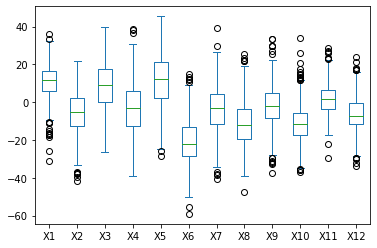

In [166]:
df.plot.box()